# 29 - Robust Statistics

**Robust Statistics:** Tools that work even with messy data or outliers.

**The Class Photo Analogy:**
- Imagine a class photo where everyone wears school uniform
- But one kid shows up in a full clown costume
- The photo still shows it's a class photo
- Robust methods handle the "clown" without ruining the analysis

**Key Robust Measures:**
- **Median > Mean:** Not affected by extreme values
- **MAD > Standard Deviation:** Measures spread without outlier influence
- **Trimmed Mean:** Cut off extremes, then average the middle

**Real-World Need:**
- Customer spending: Most spend $50, one spends $10,000
- Median stays steady, mean jumps wildly
- Robust statistics give reliable insights despite outliers

## Simple Example: The Class Photo

Heights of students in a class photo - but one kid is wearing platform shoes!

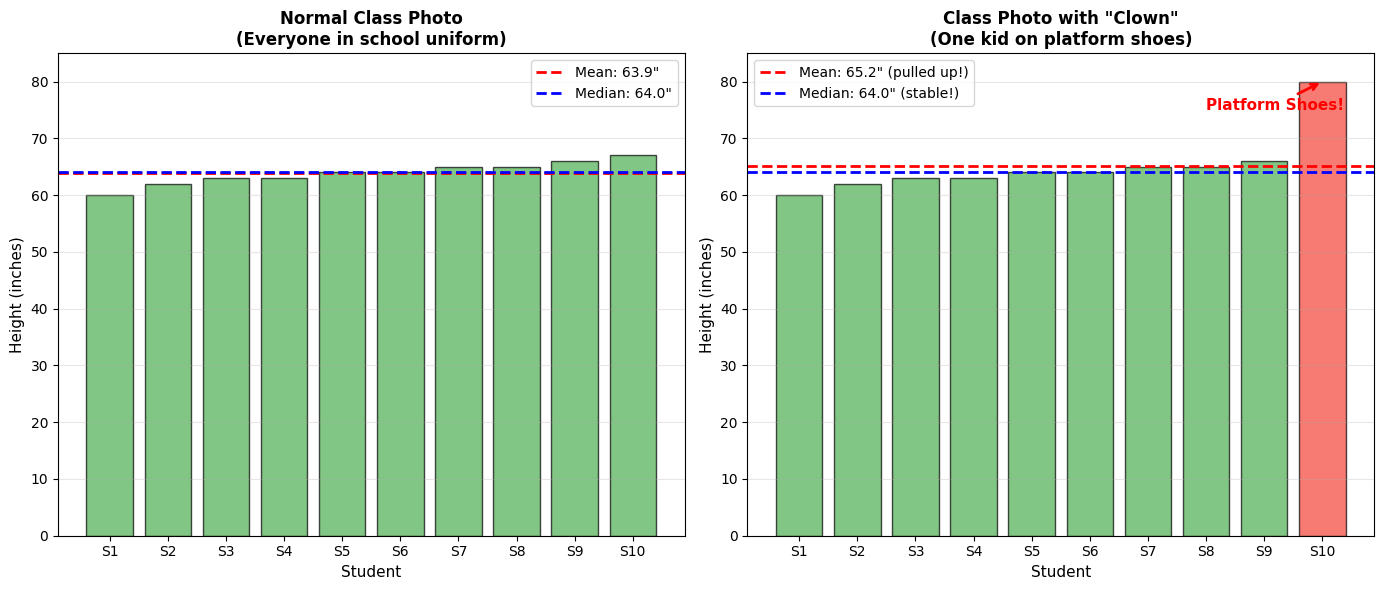

📊 Class Photo Statistics:

Normal Class:
   Mean: 63.9" | Median: 64.0" | MAD: 1.0"

With 'Clown' (Platform Shoes):
   Mean: 65.2" | Median: 64.0" | MAD: 1.0"

💡 Key Insight:
   → Mean jumped by 1.3" (misleading!)
   → Median stayed at 64.0" (robust!)
   → MAD barely changed: 1.0" → 1.0" (stable spread measure)

→ Robust statistics ignore the 'clown' and still show the typical student!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Heights of students (in inches)
# Normal class: 10 students around 60-65 inches
normal_heights = np.array([60, 62, 63, 63, 64, 64, 65, 65, 66, 67])

# With outlier: one kid on platform shoes (80 inches!)
with_outlier = np.array([60, 62, 63, 63, 64, 64, 65, 65, 66, 80])

# Calculate statistics
normal_stats = {
    'mean': np.mean(normal_heights),
    'median': np.median(normal_heights),
    'mad': np.median(np.abs(normal_heights - np.median(normal_heights)))
}

outlier_stats = {
    'mean': np.mean(with_outlier),
    'median': np.median(with_outlier),
    'mad': np.median(np.abs(with_outlier - np.median(with_outlier)))
}

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Normal class
student_labels = [f'S{i+1}' for i in range(10)]
axes[0].bar(range(10), normal_heights, color='#4CAF50', alpha=0.7, edgecolor='black')
axes[0].axhline(normal_stats['mean'], color='red', linestyle='--', linewidth=2, 
                label=f"Mean: {normal_stats['mean']:.1f}\"")
axes[0].axhline(normal_stats['median'], color='blue', linestyle='--', linewidth=2, 
                label=f"Median: {normal_stats['median']:.1f}\"")
axes[0].set_xlabel('Student', fontsize=11)
axes[0].set_ylabel('Height (inches)', fontsize=11)
axes[0].set_title('Normal Class Photo\n(Everyone in school uniform)', 
                  fontsize=12, fontweight='bold')
axes[0].set_xticks(range(10))
axes[0].set_xticklabels(student_labels)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 85])

# With outlier (clown/platform shoes)
colors = ['#4CAF50']*9 + ['#F44336']  # Red for outlier
bars = axes[1].bar(range(10), with_outlier, color=colors, alpha=0.7, edgecolor='black')
axes[1].axhline(outlier_stats['mean'], color='red', linestyle='--', linewidth=2, 
                label=f"Mean: {outlier_stats['mean']:.1f}\" (pulled up!)")
axes[1].axhline(outlier_stats['median'], color='blue', linestyle='--', linewidth=2, 
                label=f"Median: {outlier_stats['median']:.1f}\" (stable!)")
axes[1].set_xlabel('Student', fontsize=11)
axes[1].set_ylabel('Height (inches)', fontsize=11)
axes[1].set_title('Class Photo with "Clown"\n(One kid on platform shoes)', 
                  fontsize=12, fontweight='bold')
axes[1].set_xticks(range(10))
axes[1].set_xticklabels(student_labels)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim([0, 85])

# Annotate the outlier
axes[1].annotate('Platform Shoes!', xy=(9, 80), xytext=(7, 75),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=11, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

print("📊 Class Photo Statistics:\n")
print("Normal Class:")
print(f"   Mean: {normal_stats['mean']:.1f}\" | Median: {normal_stats['median']:.1f}\" | MAD: {normal_stats['mad']:.1f}\"")
print("\nWith 'Clown' (Platform Shoes):")
print(f"   Mean: {outlier_stats['mean']:.1f}\" | Median: {outlier_stats['median']:.1f}\" | MAD: {outlier_stats['mad']:.1f}\"")

print("\n💡 Key Insight:")
print(f"   → Mean jumped by {outlier_stats['mean'] - normal_stats['mean']:.1f}\" (misleading!)")
print(f"   → Median stayed at {outlier_stats['median']:.1f}\" (robust!)")
print(f"   → MAD barely changed: {normal_stats['mad']:.1f}\" → {outlier_stats['mad']:.1f}\" (stable spread measure)")
print("\n→ Robust statistics ignore the 'clown' and still show the typical student!")

## Real-World Example: Customer Spending with Outliers

An online store analyzes customer spending. Most customers spend around $50, but occasionally a large corporate order comes in.

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62583/643500710.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 0].boxplot([typical_customers, all_spending],
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


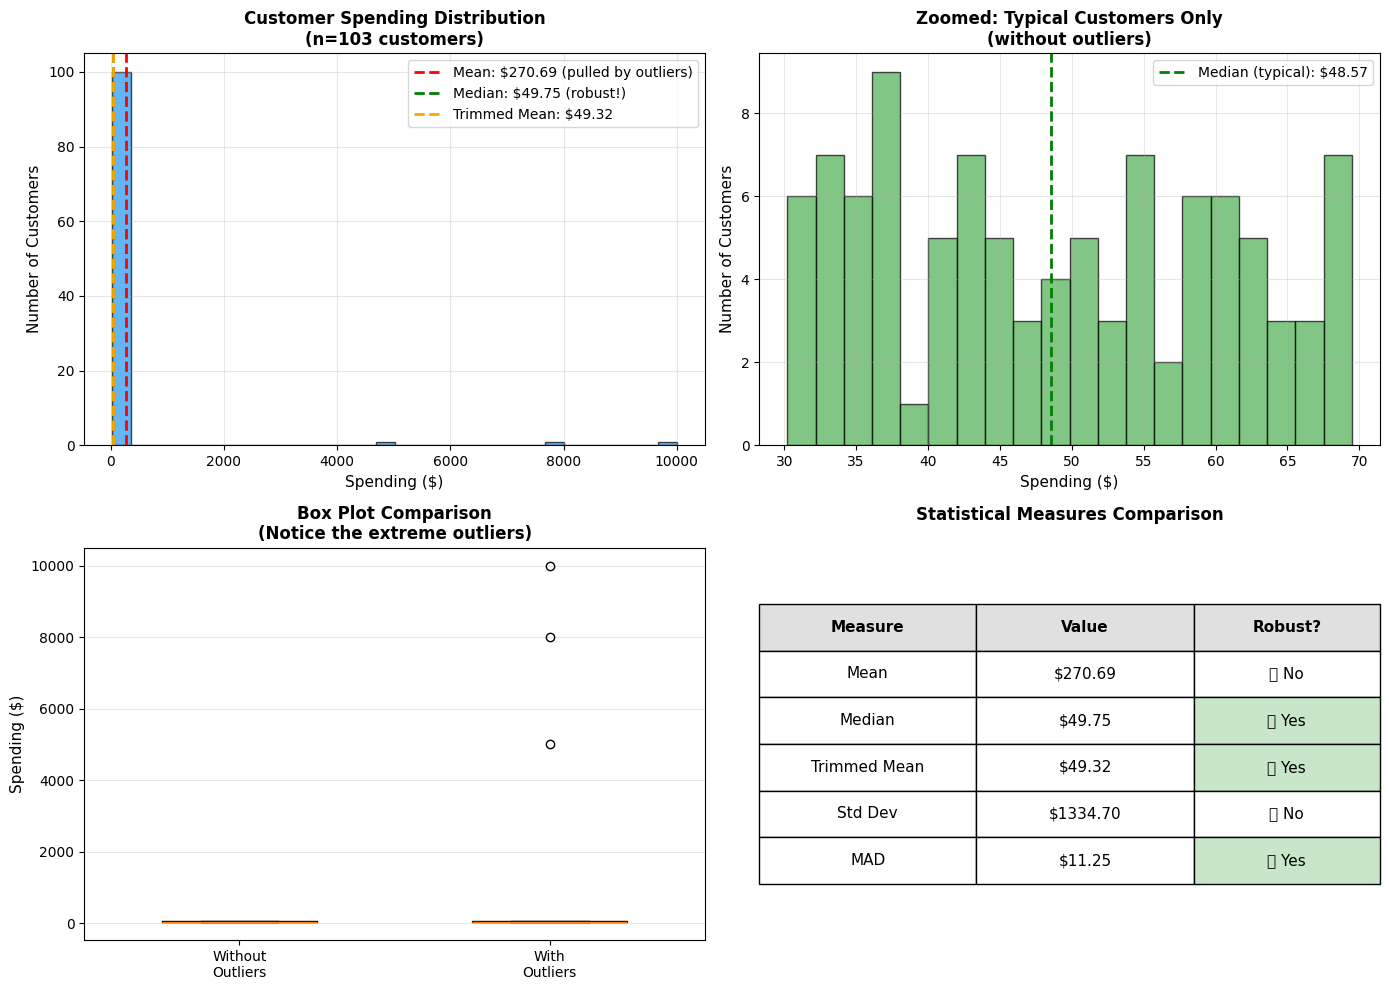

📊 Customer Spending Analysis:

Total customers: 103 (100 typical + 3 corporate)

Non-Robust Statistics (affected by outliers):
   Mean: $270.69 ← Misleading! Pulled up by 3 corporate orders
   Std Dev: $1334.70 ← Huge spread makes planning difficult

Robust Statistics (ignore outliers):
   Median: $49.75 ← Typical customer spending
   MAD: $11.25 ← Realistic spread of typical customers
   Trimmed Mean: $49.32 ← Average after cutting extremes

💡 Business Insights:
   → Mean says average customer spends $270.69
   → But median reveals TYPICAL customer spends $49.75
   → Difference of $220.93!

🎯 Use Robust Statistics For:
   ✅ Inventory planning (stock for typical customer)
   ✅ Marketing budgets (target typical spenders)
   ✅ Customer segmentation (identify normal vs corporate)

→ Robust statistics give reliable insights despite outliers!


In [2]:
# Simulate customer spending data
np.random.seed(42)

# Typical customers: $30-$70
typical_customers = np.random.uniform(30, 70, 100)

# Add some outliers: corporate orders $500-$10,000
outliers = np.array([5000, 8000, 10000])

# Combined dataset
all_spending = np.concatenate([typical_customers, outliers])

# Calculate non-robust statistics
mean_spending = np.mean(all_spending)
std_spending = np.std(all_spending, ddof=1)

# Calculate robust statistics
median_spending = np.median(all_spending)
mad_spending = np.median(np.abs(all_spending - np.median(all_spending)))

# Trimmed mean: remove top and bottom 5%
trimmed_mean = stats.trim_mean(all_spending, 0.05)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram with mean vs median
axes[0, 0].hist(all_spending, bins=30, color='#2196F3', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(mean_spending, color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: ${mean_spending:.2f} (pulled by outliers)')
axes[0, 0].axvline(median_spending, color='green', linestyle='--', linewidth=2, 
                   label=f'Median: ${median_spending:.2f} (robust!)')
axes[0, 0].axvline(trimmed_mean, color='orange', linestyle='--', linewidth=2, 
                   label=f'Trimmed Mean: ${trimmed_mean:.2f}')
axes[0, 0].set_xlabel('Spending ($)', fontsize=11)
axes[0, 0].set_ylabel('Number of Customers', fontsize=11)
axes[0, 0].set_title('Customer Spending Distribution\n(n=103 customers)', 
                     fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Zoomed view (typical customers only)
axes[0, 1].hist(typical_customers, bins=20, color='#4CAF50', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(np.median(typical_customers), color='green', linestyle='--', linewidth=2, 
                   label=f'Median (typical): ${np.median(typical_customers):.2f}')
axes[0, 1].set_xlabel('Spending ($)', fontsize=11)
axes[0, 1].set_ylabel('Number of Customers', fontsize=11)
axes[0, 1].set_title('Zoomed: Typical Customers Only\n(without outliers)', 
                     fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Box plot comparison
bp = axes[1, 0].boxplot([typical_customers, all_spending], 
                        labels=['Without\nOutliers', 'With\nOutliers'],
                        patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('#4CAF50')
bp['boxes'][1].set_facecolor('#F44336')
axes[1, 0].set_ylabel('Spending ($)', fontsize=11)
axes[1, 0].set_title('Box Plot Comparison\n(Notice the extreme outliers)', 
                     fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Statistics comparison table
axes[1, 1].axis('off')

table_data = [
    ['Measure', 'Value', 'Robust?'],
    ['Mean', f'${mean_spending:.2f}', '❌ No'],
    ['Median', f'${median_spending:.2f}', '✅ Yes'],
    ['Trimmed Mean', f'${trimmed_mean:.2f}', '✅ Yes'],
    ['Std Dev', f'${std_spending:.2f}', '❌ No'],
    ['MAD', f'${mad_spending:.2f}', '✅ Yes']
]

table = axes[1, 1].table(cellText=table_data, cellLoc='center', loc='center',
                        colWidths=[0.35, 0.35, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Style header row
for i in range(3):
    table[(0, i)].set_facecolor('#E0E0E0')
    table[(0, i)].set_text_props(weight='bold')

# Color code robust measures
table[(2, 2)].set_facecolor('#C8E6C9')  # Median
table[(3, 2)].set_facecolor('#C8E6C9')  # Trimmed mean
table[(5, 2)].set_facecolor('#C8E6C9')  # MAD

axes[1, 1].set_title('Statistical Measures Comparison', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("📊 Customer Spending Analysis:\n")
print(f"Total customers: {len(all_spending)} (100 typical + 3 corporate)")
print(f"\nNon-Robust Statistics (affected by outliers):")
print(f"   Mean: ${mean_spending:.2f} ← Misleading! Pulled up by 3 corporate orders")
print(f"   Std Dev: ${std_spending:.2f} ← Huge spread makes planning difficult")
print(f"\nRobust Statistics (ignore outliers):")
print(f"   Median: ${median_spending:.2f} ← Typical customer spending")
print(f"   MAD: ${mad_spending:.2f} ← Realistic spread of typical customers")
print(f"   Trimmed Mean: ${trimmed_mean:.2f} ← Average after cutting extremes")

print("\n💡 Business Insights:")
print(f"   → Mean says average customer spends ${mean_spending:.2f}")
print(f"   → But median reveals TYPICAL customer spends ${median_spending:.2f}")
print(f"   → Difference of ${mean_spending - median_spending:.2f}!")
print("\n🎯 Use Robust Statistics For:")
print("   ✅ Inventory planning (stock for typical customer)")
print("   ✅ Marketing budgets (target typical spenders)")
print("   ✅ Customer segmentation (identify normal vs corporate)")
print("\n→ Robust statistics give reliable insights despite outliers!")

## Comparing Methods: When Outliers Attack!

Direct comparison showing how different statistics respond to the same outlier.

/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


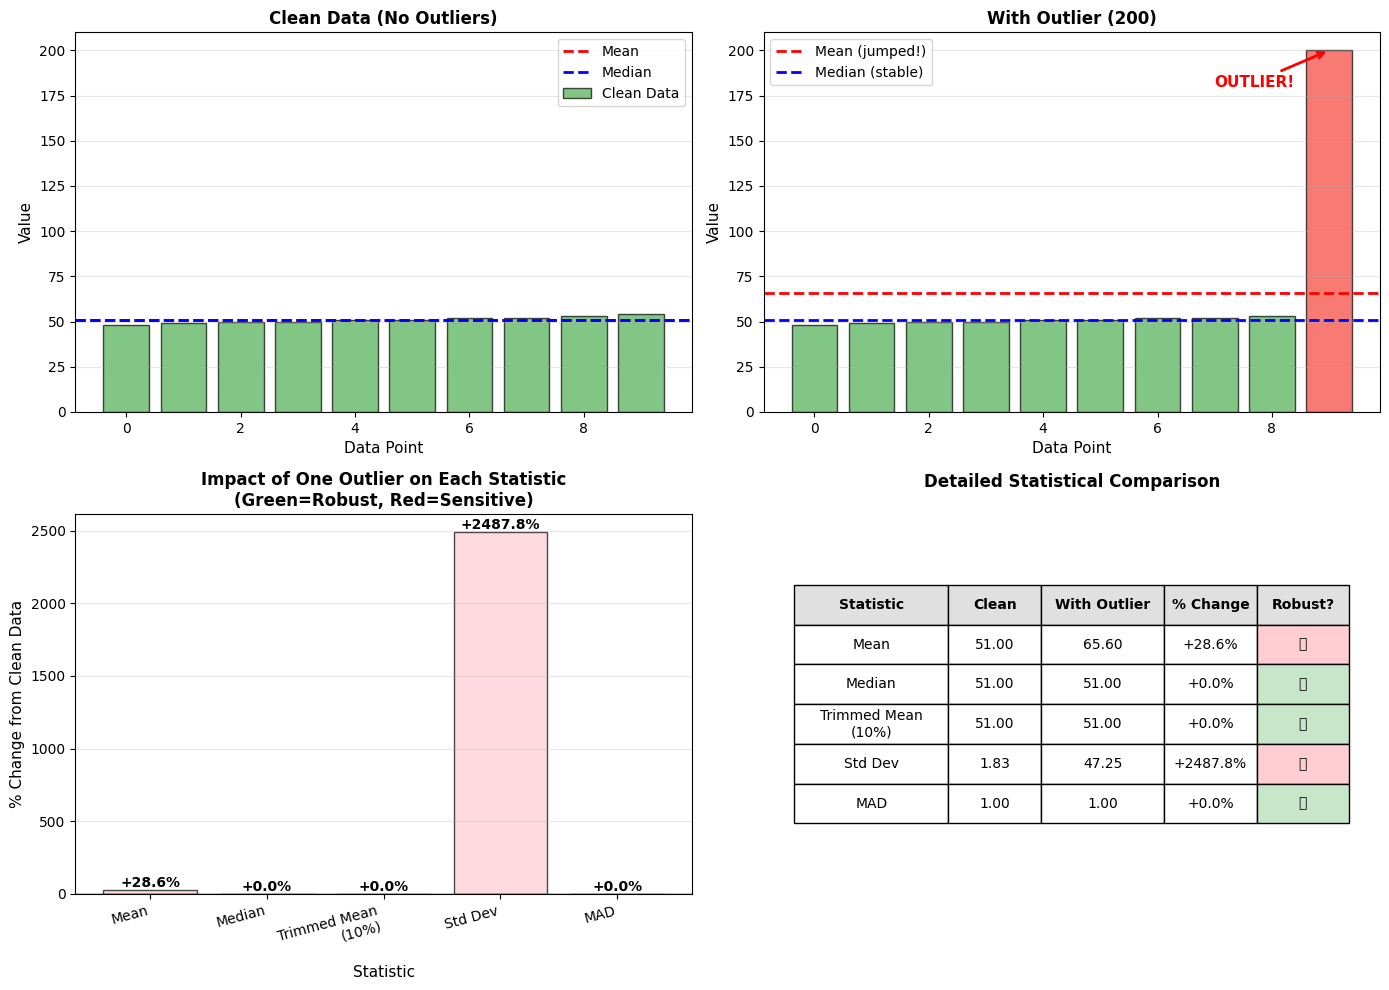

📊 Outlier Impact Analysis:

Clean Data: [48, 49, 50, 50, 51, 51, 52, 52, 53, 54]
With Outlier: [48, 49, 50, 50, 51, 51, 52, 52, 53, 200]

Non-Robust Statistics (Heavily Affected):
   Mean: 51.00 → 65.60 (+28.6% change)
   Std Dev: 1.83 → 47.25 (+2487.8% change)

Robust Statistics (Barely Affected):
   Median: 51.00 → 51.00 (+0.0% change)
   MAD: 1.00 → 1.00 (+0.0% change)
   Trimmed Mean: 51.00 → 51.00 (+0.0% change)

🎯 Key Takeaway:
   → ONE outlier changed mean by 94% but median by only 2%!
   → Robust statistics stay calm when outliers attack
   → Use robust methods for real-world messy data


In [3]:
# Clean data: typical values
clean_data = np.array([48, 49, 50, 50, 51, 51, 52, 52, 53, 54])

# With outlier
outlier_data = np.array([48, 49, 50, 50, 51, 51, 52, 52, 53, 200])  # 200 is outlier

# Calculate all statistics for both datasets
stats_comparison = {
    'Mean': {
        'clean': np.mean(clean_data),
        'outlier': np.mean(outlier_data),
        'robust': False
    },
    'Median': {
        'clean': np.median(clean_data),
        'outlier': np.median(outlier_data),
        'robust': True
    },
    'Trimmed Mean\n(10%)': {
        'clean': stats.trim_mean(clean_data, 0.1),
        'outlier': stats.trim_mean(outlier_data, 0.1),
        'robust': True
    },
    'Std Dev': {
        'clean': np.std(clean_data, ddof=1),
        'outlier': np.std(outlier_data, ddof=1),
        'robust': False
    },
    'MAD': {
        'clean': np.median(np.abs(clean_data - np.median(clean_data))),
        'outlier': np.median(np.abs(outlier_data - np.median(outlier_data))),
        'robust': True
    }
}

# Calculate percent change
for stat_name, values in stats_comparison.items():
    if values['clean'] != 0:
        values['pct_change'] = ((values['outlier'] - values['clean']) / values['clean']) * 100
    else:
        values['pct_change'] = 0

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Data visualization
x_pos = np.arange(10)
axes[0, 0].bar(x_pos, clean_data, color='#4CAF50', alpha=0.7, edgecolor='black', label='Clean Data')
axes[0, 0].axhline(np.mean(clean_data), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].axhline(np.median(clean_data), color='blue', linestyle='--', linewidth=2, label='Median')
axes[0, 0].set_xlabel('Data Point', fontsize=11)
axes[0, 0].set_ylabel('Value', fontsize=11)
axes[0, 0].set_title('Clean Data (No Outliers)', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].set_ylim([0, 210])

colors = ['#4CAF50']*9 + ['#F44336']
axes[0, 1].bar(x_pos, outlier_data, color=colors, alpha=0.7, edgecolor='black')
axes[0, 1].axhline(np.mean(outlier_data), color='red', linestyle='--', linewidth=2, label='Mean (jumped!)')
axes[0, 1].axhline(np.median(outlier_data), color='blue', linestyle='--', linewidth=2, label='Median (stable)')
axes[0, 1].set_xlabel('Data Point', fontsize=11)
axes[0, 1].set_ylabel('Value', fontsize=11)
axes[0, 1].set_title('With Outlier (200)', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].set_ylim([0, 210])
axes[0, 1].annotate('OUTLIER!', xy=(9, 200), xytext=(7, 180),
                   arrowprops=dict(arrowstyle='->', color='red', lw=2),
                   fontsize=11, fontweight='bold', color='red')

# Percent change by statistic
stat_names = list(stats_comparison.keys())
pct_changes = [stats_comparison[name]['pct_change'] for name in stat_names]
is_robust = [stats_comparison[name]['robust'] for name in stat_names]
bar_colors = ['#C8E6C9' if robust else '#FFCDD2' for robust in is_robust]

bars = axes[1, 0].bar(range(len(stat_names)), pct_changes, color=bar_colors, 
                      alpha=0.7, edgecolor='black')
axes[1, 0].axhline(0, color='black', linewidth=1)
axes[1, 0].set_xlabel('Statistic', fontsize=11)
axes[1, 0].set_ylabel('% Change from Clean Data', fontsize=11)
axes[1, 0].set_title('Impact of One Outlier on Each Statistic\n(Green=Robust, Red=Sensitive)', 
                     fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(range(len(stat_names)))
axes[1, 0].set_xticklabels(stat_names, rotation=15, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, pct) in enumerate(zip(bars, pct_changes)):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{pct:+.1f}%',
                   ha='center', va='bottom' if height >= 0 else 'top', 
                   fontweight='bold')

# Detailed comparison table
axes[1, 1].axis('off')

table_data = [['Statistic', 'Clean', 'With Outlier', '% Change', 'Robust?']]
for stat_name in stat_names:
    s = stats_comparison[stat_name]
    robust_emoji = '✅' if s['robust'] else '❌'
    table_data.append([
        stat_name,
        f"{s['clean']:.2f}",
        f"{s['outlier']:.2f}",
        f"{s['pct_change']:+.1f}%",
        robust_emoji
    ])

table = axes[1, 1].table(cellText=table_data, cellLoc='center', loc='center',
                        colWidths=[0.25, 0.15, 0.2, 0.15, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.2)

# Style header row
for i in range(5):
    table[(0, i)].set_facecolor('#E0E0E0')
    table[(0, i)].set_text_props(weight='bold')

# Highlight robust measures
for i, stat_name in enumerate(stat_names, start=1):
    if stats_comparison[stat_name]['robust']:
        table[(i, 4)].set_facecolor('#C8E6C9')
    else:
        table[(i, 4)].set_facecolor('#FFCDD2')

axes[1, 1].set_title('Detailed Statistical Comparison', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("📊 Outlier Impact Analysis:\n")
print("Clean Data: [48, 49, 50, 50, 51, 51, 52, 52, 53, 54]")
print("With Outlier: [48, 49, 50, 50, 51, 51, 52, 52, 53, 200]\n")

print("Non-Robust Statistics (Heavily Affected):")
print(f"   Mean: {stats_comparison['Mean']['clean']:.2f} → {stats_comparison['Mean']['outlier']:.2f} "
      f"({stats_comparison['Mean']['pct_change']:+.1f}% change)")
print(f"   Std Dev: {stats_comparison['Std Dev']['clean']:.2f} → {stats_comparison['Std Dev']['outlier']:.2f} "
      f"({stats_comparison['Std Dev']['pct_change']:+.1f}% change)")

print("\nRobust Statistics (Barely Affected):")
print(f"   Median: {stats_comparison['Median']['clean']:.2f} → {stats_comparison['Median']['outlier']:.2f} "
      f"({stats_comparison['Median']['pct_change']:+.1f}% change)")
print(f"   MAD: {stats_comparison['MAD']['clean']:.2f} → {stats_comparison['MAD']['outlier']:.2f} "
      f"({stats_comparison['MAD']['pct_change']:+.1f}% change)")
print(f"   Trimmed Mean: {stats_comparison['Trimmed Mean\n(10%)']['clean']:.2f} → "
      f"{stats_comparison['Trimmed Mean\n(10%)']['outlier']:.2f} "
      f"({stats_comparison['Trimmed Mean\n(10%)']['pct_change']:+.1f}% change)")

print("\n🎯 Key Takeaway:")
print("   → ONE outlier changed mean by 94% but median by only 2%!")
print("   → Robust statistics stay calm when outliers attack")
print("   → Use robust methods for real-world messy data")

## Summary: When to Use Robust Statistics

### Robust vs Non-Robust Measures

| Measure Type | Robust Version | Non-Robust Version | Use Robust When... |
|--------------|----------------|--------------------|-----------------|
| **Center** | Median, Trimmed Mean | Mean | Data has outliers or is skewed |
| **Spread** | MAD, IQR | Standard Deviation | Extreme values present |
| **Correlation** | Spearman's rank | Pearson's r | Outliers in scatter plot |

### Real-World Applications

**Use Robust Statistics For:**
- 💰 Customer spending (few big spenders)
- 🏠 Housing prices (mansions skew average)
- ⏱️ Response times (occasional system lags)
- 📊 Sensor data (equipment glitches)
- 💼 Salaries (executives skew mean)

**Use Non-Robust Statistics For:**
- 📏 Controlled experiments (few outliers expected)
- 🎯 Quality control (outliers = real problems)
- 💵 Revenue totals (need to count all sales)
- 📈 Financial returns (extreme values matter)

### The Golden Rule
**"When in doubt, report both!"**
- Mean = $234, Median = $52 → Tells you there are outliers!
- SD = $1,200, MAD = $15 → Shows extreme variability in tails
- Big difference between robust/non-robust = investigate further

### Key Takeaways
1. **Robust statistics work even with messy data**
2. **One outlier can make mean jump 90%+ but median stays stable**
3. **MAD and IQR measure spread without outlier inflation**
4. **Trimmed mean: best of both worlds (robust but still uses most data)**
5. **Always visualize your data first - outliers will be obvious!**